<a href="https://colab.research.google.com/github/mdfardinxyz/Project-Magnitude-eQuinox-/blob/main/Project_Magnitude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Course Name: Introduction to Astronomy

Course ID: **AST201**

Sec: 01

Semester: Summer

**Group Members:**


*   **Israt Jahan** - 2130364
*   **Md Fardin Islam** - 2130399
*   **Mollika Rani Del** - 2010224
*   **Zakia Nazzum** - 2130086

# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/content/drive/.shortcut-targets-by-id/1-CLOaG1xzH7r8RqCM0nuvdlFx9VrbP8H/ast201images/Vega


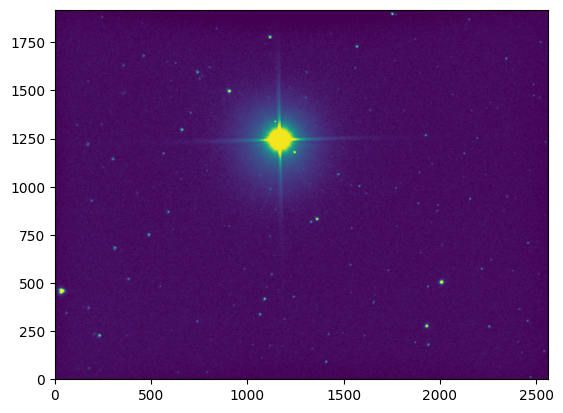

In [ ]:
%cd /content/drive/MyDrive/ast201images/Vega
import os
f = os.listdir('.')

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# plt.imshow(Image.open(f[0])); plt.show()
# plt.imshow(Image.open(f[50]))

im = np.array(Image.open(f[50]))

img = np.dot(im, [0.2989, 0.5870, 0.1140])

plt.imshow(img, origin='lower')


# Photutils

In [ ]:
!pip install photutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.2 MB/s eta 0:00:00


# Vega

## Background

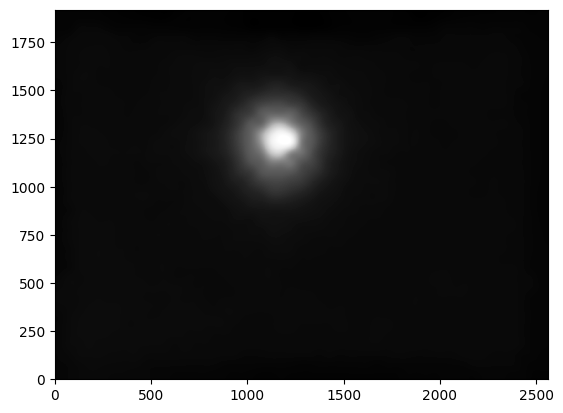

In [ ]:
from astropy.visualization.mpl_normalize import simple_norm
from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground

ny, nx = img.shape
y, x = np.mgrid[:ny, :nx]

norm = simple_norm(img, 'sqrt', percent=99)
# plt.imshow(img, norm=norm, origin='lower', cmap='Greys_r', interpolation='nearest')

sigma_clip = SigmaClip(sigma=3.0)
bkg_estimator = MedianBackground()
bkg = Background2D(img, (50, 50), filter_size=(3, 3), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

backg = bkg.background

plt.imshow(backg, origin='lower', cmap='Greys_r', interpolation='nearest')


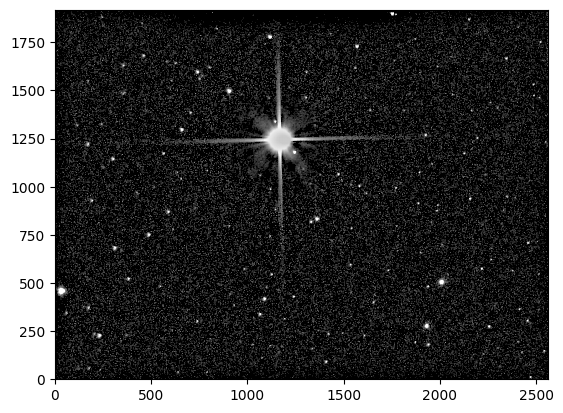

In [ ]:
img2 = img - backg
plt.imshow(img2, norm=norm, origin='lower', cmap='Greys_r', interpolation='nearest')


## Noise

In [ ]:
from astropy.io import fits

hdu = fits.PrimaryHDU(data=img2)
hdu.writeto('img2.fits', overwrite=True)

#hdu = fits.PrimaryHDU(data=img)
#hdu.writeto('img.fits', overwrite=True)


In [ ]:
from photutils.datasets import make_test_psf_data, make_noise_image
from photutils.psf import IntegratedGaussianPRF

noise = make_noise_image(img2.shape, mean=0.3, stddev=3.3, seed=0)
error = np.abs(noise)


## PSF photometry

In [ ]:
!pip install photutils

 id   x_fit     y_fit    flux_fit
--- --------- --------- ---------
  1 2468.1639    9.3560 1713.3742
  2 1409.2150   90.2653 4072.6800
  3 2425.3767  139.7072 1038.0700
  4 2539.2195  145.3302 3137.6339
  5 1334.4859  158.3018 1261.4696
  6 1116.9640  173.4738 1123.9434
  7 1028.0273  178.3100 1174.9286
  8 1938.7614  180.1360 3519.0267
  9 1870.5301  190.8967 1938.3517
 10  233.4035  226.0667 6598.8789
...       ...       ...       ...
114 1569.4306 1723.6401 5589.2886
115 2520.3802 1748.3310 1230.4052
116 1870.9079 1763.6766 1366.6886
117 1115.8905 1770.5913 3602.5542
118 1114.0509 1775.1858 3769.4843
119 2148.7487 1866.0245 1002.6516
120 1751.9760 1892.8593 3445.2343
121 1749.7373 1893.9340 5088.9921
122 1770.6518 1892.2135 1393.0970
123 1752.4423 1894.3744 5243.5151
124 1322.3655 1917.1092  993.3212
Length = 124 rows


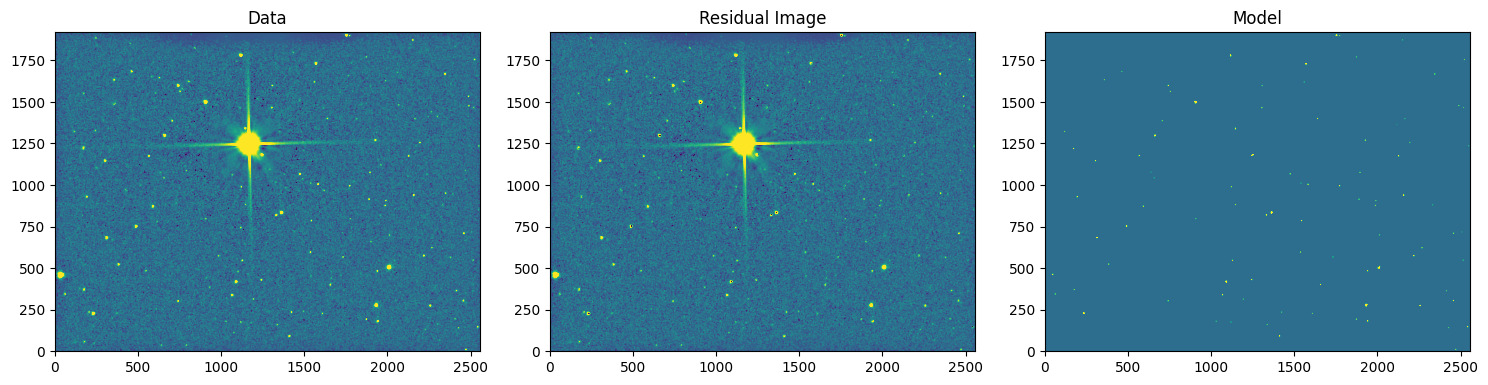

In [ ]:
from photutils.detection import DAOStarFinder
from photutils.psf import PSFPhotometry
from astropy.visualization.mpl_normalize import simple_norm

fit_shape = (5, 5)

finder = DAOStarFinder(threshold=30., fwhm=2.)

psf_shape = (25, 25)

psf_model = IntegratedGaussianPRF(flux=1, sigma=1.1)

psfphot = PSFPhotometry(psf_model, fit_shape, finder=finder, aperture_radius=5)

phot = psfphot(img2, error=error)

resid = psfphot.make_residual_image(img2, psf_shape)

phot['x_fit'].info.format = '.4f'  # optional format
phot['y_fit'].info.format = '.4f'
phot['flux_fit'].info.format = '.4f'
print(phot[('id', 'x_fit', 'y_fit', 'flux_fit')])


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

model = img2 - resid

norm = simple_norm(img2, 'sqrt', percent=99)
ax[0].imshow(img2, origin='lower', norm=norm)
ax[2].imshow(model, origin='lower', norm=norm)
im = ax[1].imshow(resid, origin='lower', norm=norm)

ax[0].set_title('Data')
ax[2].set_title('Model')
ax[1].set_title('Residual Image')
plt.tight_layout()


In [ ]:
from astropy.io import fits

hdu = fits.PrimaryHDU(data=model)
hdu.writeto('model.fits', overwrite=True)

# Stellarium was used to find out the name of the stellar object.



**Reference star (A) = Gaia DR2 2097891657798430848**

**Test star (B) = Gaia DR2 2097939383475063296**

#Extract Data from known "Name"

In [ ]:
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 27.3 MB/s eta 0:00:00


In [ ]:
import astropy.units as u
from astroquery.simbad import Simbad
from astroquery.gaia import Gaia
from astropy.coordinates import SkyCoord


# Replace 'YourStarName' with the actual designation or object name of the star
star_name = 'Gaia DR2 2097891657798430848'

# Resolve the star's coordinates using SIMBAD
customSimbad = Simbad()
customSimbad.TIMEOUT = 120  # Adjust the timeout if necessary
customSimbad.add_votable_fields('ra', 'dec', 'id', 'plx', 'pm')
result_table = customSimbad.query_object(star_name)

if result_table is not None:
    # Extract the coordinates and other information
    ra = result_table['RA'][0]
    dec = result_table['DEC'][0]

    # Query Gaia for star details using the coordinates
    coord = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg), frame='icrs')
    width = u.Quantity(0.01, u.deg)  # Adjust the search width as needed
    height = u.Quantity(0.01, u.deg)  # Adjust the search height


    Gaia.ROW_LIMIT = -1

    r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

    # Print the first row (row index 0) from the Gaia query results
    if len(r) > 0:
        row_0 = r[0]
        print(row_0)
    else:
        print("No results found in Gaia for the provided coordinates.")
else:
    print(f"No results found for star '{star_name}' in SIMBAD.")



INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id             DESIGNATION               source_id      random_index ref_epoch         ra              ra_error              dec             dec_error            parallax        parallax_error    parallax_over_error        pmra             pmra_error           pmdec            pmdec_error      ra_dec_corr ra_parallax_corr ra_pmra_corr ra_pmdec_corr dec_parallax_corr dec_pmra_corr dec_pmdec_corr parallax_pmra_corr parallax_pmdec_corr pmra_pmdec_corr astrometric_n_obs_al astrometric_n_obs_ac astrometric_n_good_obs_al astrometric_n_bad_obs_al astrometric_gof_al astrometric_chi2_al astrometric_excess_noise astrometric_excess_noise_sig astrometric_params_solved astrometric_primary_flag astrometric_weight_al astrometric_pseudo_colour astrometric_pseudo_colour_error mean_varpi_factor_al astrometric_matched_observations visibility_periods_used astrometric_sigma5d_max frame_rotator_object_type matched_observati

#Performing Photometric Calibration

Now we will perform photometric calibration on nearby two stars of Vega. Let us define our Reference and Test star,

#Reference Star --------------
**Star A**:
**Gaia DR2 2097891657798430848**

**x_fit** = 1331;
**y_fit** = 818

**flux_fit (from ds9) = 765.311**

**True_flux_A = 406590.8711472734**

**True_magnitude_A = 11.665472**

#Test Star ------------
**Star B**:
**Gaia DR2 2097939383475063296**

**x_fit** = 1119;
**y_fit** = 986,

**flux_fit (from ds9) = 226.241**





To perform photometric calibration and calculate the actual magnitude of the test star, we can use the known information about the reference star. Here's a general outline of the steps to follow:

    Obtain the Known Calibration Information:
        We know the flux and magnitude of the reference star. Let's call this star "Star A."
        We also have the flux_fit value for Star A using ds9.

        Now,

        calibration_factor = True_flux / flux_fit.

        True_flux_B = flux_fit_star_B * calibration_factor
        
        True_magnitude_B = True_magnitude_A - (2.5 * log10(True_flux_B / True_flux_A))


In [ ]:
# Known values
import numpy as np
flux_fit_star_A = 765.311
flux_fit_star_B = 226.241

True_magnitude_A = 11.665472
True_flux_A = 406590.8711472734  #electron/s

# Calculate the calibration factor for Star A
calibration_factor = True_flux_A / flux_fit_star_A

# Calculate the true flux in electron/s for Star B using the calibration factor
True_flux_B = flux_fit_star_B * calibration_factor

#Calculating True Magnitude of Star B
True_magnitude_B = True_magnitude_A - (2.5 * np.log10(True_flux_B / True_flux_A))

print("True Flux:", True_flux_B)
print("True magnitude:", True_magnitude_B)

True Flux: 120196.26698065268
True magnitude: 12.988638609657132


**True magnitude of Star B is 12.69 (value was found using Stellarium.)**

After considering magnitude error bar from the **GAIA Database** which is **12.7386 ± 0.0002**, we can finally get the true magnitude of the test star.